In [ ]:
from google.colab import drive
drive.mount('/content/drive')


: 

In [2]:
import pandas as pd

In [6]:
test = pd.read_csv('drive/My Drive/ASONAM17_Damage_Image_Dataset/nepal.test', encoding='latin1')
train  = pd.read_csv('drive/My Drive/ASONAM17_Damage_Image_Dataset/nepal.train', encoding='latin1')
dev = pd.read_csv('drive/My Drive/ASONAM17_Damage_Image_Dataset/nepal.dev', encoding='latin1')

In [7]:
print(test.shape)
print(train.shape)
print(dev.shape)

(3819, 1)
(11462, 1)
(3820, 1)


In [ ]:
test.head(5)

,nepal_eq/nepal_eq_severe_im_11821.jpg 2
0,nepal_eq/nepal_eq_severe_im_19519.jpg 2
1,nepal_eq/nepal_eq_severe_im_33423.jpg 2
2,nepal_eq/nepal_eq_severe_im_23786.jpg 2
3,nepal_eq/nepal_eq_severe_im_12447.jpg 2
4,nepal_eq/nepal_eq_severe_im_21868.jpg 2


In [ ]:
train.head(10)

,nepal_eq/nepal_eq_severe_im_16084.jpg 2
0,nepal_eq/nepal_eq_none_im_42600.jpg 0
1,nepal_eq/nepal_eq_none_im_4536.jpg 0
2,nepal_eq/nepal_eq_severe_im_41412.jpg 2
3,nepal_eq/nepal_eq_none_im_31122.jpg 0
4,nepal_eq/nepal_eq_severe_im_33577.jpg 2
5,nepal_eq/nepal_eq_none_im_28503.jpg 0
6,nepal_eq/nepal_eq_severe_im_14639.jpg 2
7,nepal_eq/nepal_eq_severe_im_16578.jpg 2
8,nepal_eq/nepal_eq_severe_im_27826.jpg 2
9,nepal_eq/nepal_eq_none_im_11205.jpg 0


In [ ]:
dev.head(10)

,nepal_eq/nepal_eq_none_im_30210.jpg 0
0,nepal_eq/nepal_eq_severe_im_37420.jpg 2
1,nepal_eq/nepal_eq_severe_im_14014.jpg 2
2,nepal_eq/nepal_eq_none_im_36684.jpg 0
3,nepal_eq/nepal_eq_severe_im_11823.jpg 2
4,nepal_eq/nepal_eq_none_im_41608.jpg 0
5,nepal_eq/nepal_eq_severe_im_34189.jpg 2
6,nepal_eq/nepal_eq_severe_im_789.jpg 2
7,nepal_eq/nepal_eq_severe_im_22005.jpg 2
8,nepal_eq/nepal_eq_none_im_22829.jpg 0
9,nepal_eq/nepal_eq_severe_im_15071.jpg 2


In [ ]:
len(train)
train[0:5]

,nepal_eq/nepal_eq_severe_im_16084.jpg 2
0,nepal_eq/nepal_eq_none_im_42600.jpg 0
1,nepal_eq/nepal_eq_none_im_4536.jpg 0
2,nepal_eq/nepal_eq_severe_im_41412.jpg 2
3,nepal_eq/nepal_eq_none_im_31122.jpg 0
4,nepal_eq/nepal_eq_severe_im_33577.jpg 2


In [8]:
train.columns=["Image"]

In [9]:
test.columns=["Image"]
dev.columns=["Image"]

In [10]:

train_x = []
train_y = []

for row in train["Image"]:
    parts = row.split(" ")
    train_x.append(parts[0])
    train_y.append(parts[-1])

print("Length of train:", len(train))
print("Length of train_x:", len(train_x))
print("Length of train_y:", len(train_y))

Length of train: 11462
Length of train_x: 11462
Length of train_y: 11462


In [11]:
test_x = []
test_y = []

for row in test["Image"]:
    parts = row.split(" ")
    test_x.append(parts[0])
    test_y.append(parts[-1])

print("Length of test:", len(test))
print("Length of test_x:", len(test_x))
print("Length of test_y:", len(test_y))


Length of test: 3819
Length of test_x: 3819
Length of test_y: 3819


In [12]:
dev_x = []
dev_y = []

for row in dev["Image"]:
    parts = row.split(" ")
    dev_x.append(parts[0])
    dev_y.append(parts[-1])

print("Length of dev:", len(dev))
print("Length of dev_x:", len(dev_x))
print("Length of dev_y:", len(dev_y))


Length of dev: 3820
Length of dev_x: 3820
Length of dev_y: 3820


In [ ]:

!ls drive/MyDrive/ASONAM17_Damage_Image_Dataset

 classes.txt	        ecuador.train   matthew.dev	    nepal_eq	  ruby.test
'Copy of nepal.train'   gg.dev	        matthew_hurricane   nepal.test	  ruby.train
 ecuador.dev	        ggImage         matthew.test	    nepal.train   ruby_typhoon
 ecuador_eq	        gg.test         matthew.train	    README.txt
 ecuador.test	        gg.train        nepal.dev	    ruby.dev


In [13]:
import os
path_train=os.listdir('drive/MyDrive/ASONAM17_Damage_Image_Dataset/nepal_eq')

In [ ]:
type(train_x[0])


str

In [ ]:
type(path_train[0])
print(path_train[0:5])

['nepal_eq_none_im_42191.jpg', 'nepal_eq_none_im_41814.jpg', 'nepal_eq_none_im_42105.jpg', 'nepal_eq_none_im_42024.jpg', 'nepal_eq_none_im_41972.jpg']


In [14]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image

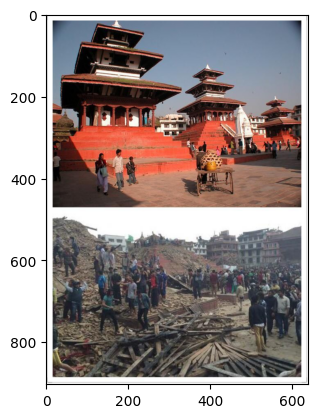

In [ ]:
img = mpimg.imread('drive/MyDrive/ASONAM17_Damage_Image_Dataset/nepal_eq/nepal_eq_severe_im_14666.jpg')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
train_x=train_x[:11000]
train_y=train_y[:11000]

In [ ]:
len(train_x)

6000

In [15]:

from PIL import Image
import numpy as np


train_data = []

path='drive/MyDrive/ASONAM17_Damage_Image_Dataset/'
# image = Image.open(path + 'nepal_eq/nepal_eq_severe_im_14666.jpg')
for img in train_x:
  image = Image.open(path + img)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  train_data.append(image)

# for img in train_x:
#   print(img)


In [ ]:
type(train_x)

list

In [16]:
test_data = []
for img in test_x:
  image = Image.open(path + img)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  test_data.append(image)

# dev_data = []
for img in dev_x:
  image = Image.open(path + img)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  train_data.append(image)

In [17]:
X_train = np.array(train_data)
X_test = np.array(test_data)
# X_dev = np.array(dev_data)
Y_train = np.array(train_y)
Y_test = np.array(test_y)
Y_dev = np.array(dev_y)

In [18]:
Y_train = np.concatenate((Y_train, Y_dev), axis=0)

In [19]:
print(X_train.shape,Y_train.shape)

(15282, 128, 128, 3) (15282,)


In [20]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255
# X_dev_scaled = X_dev/255

In [ ]:
X_train_scaled[0]

array([[[0.17254902, 0.18039216, 0.22745098],
        [0.2       , 0.20784314, 0.25490196],
        [0.23529412, 0.23921569, 0.28627451],
        ...,
        [0.91764706, 0.92941176, 0.96078431],
        [0.89019608, 0.90196078, 0.94509804],
        [0.85490196, 0.87058824, 0.91372549]],

       [[0.17254902, 0.18039216, 0.22745098],
        [0.18431373, 0.19215686, 0.23921569],
        [0.22352941, 0.23137255, 0.27843137],
        ...,
        [0.91764706, 0.92941176, 0.96078431],
        [0.89019608, 0.90196078, 0.94509804],
        [0.85490196, 0.87058824, 0.91372549]],

       [[0.18039216, 0.18823529, 0.23529412],
        [0.19215686, 0.2       , 0.24705882],
        [0.21960784, 0.22745098, 0.2745098 ],
        ...,
        [0.91764706, 0.92941176, 0.96078431],
        [0.89019608, 0.90196078, 0.94509804],
        [0.85490196, 0.87058824, 0.91372549]],

       ...,

       [[0.57647059, 0.58823529, 0.61176471],
        [0.61176471, 0.62745098, 0.64313725],
        [0.64705882, 0

In [21]:
from tensorflow.keras.utils import to_categorical
Y_train_en = to_categorical(Y_train,3)
Y_test_en = to_categorical(Y_test,3)
# Y_dev_en = to_categorical(Y_dev,3)

In [22]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score
from PIL import ImageFont
import warnings

In [23]:
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape=(128,128,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.35))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 128, 128, 32)      128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 batch_normalization_1 (Bat  (None, 128, 128, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 32)        0         
 D)                                                              
                                                        

In [25]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(X_train_scaled, Y_train_en, epochs=40, verbose=1,
                    validation_data=(X_test_scaled, Y_test_en), callbacks=[early_stopping])

Epoch 1/40
478/478 [==============================] - 273s 564ms/step - loss: 0.8971 - accuracy: 0.6692 - val_loss: 0.7286 - val_accuracy: 0.7159
Epoch 2/40
478/478 [==============================] - 262s 548ms/step - loss: 0.6607 - accuracy: 0.7527 - val_loss: 0.8618 - val_accuracy: 0.6811
Epoch 3/40
478/478 [==============================] - 261s 545ms/step - loss: 0.6098 - accuracy: 0.7701 - val_loss: 0.5900 - val_accuracy: 0.7795
Epoch 4/40
478/478 [==============================] - 261s 545ms/step - loss: 0.5841 - accuracy: 0.7805 - val_loss: 0.7210 - val_accuracy: 0.7319
Epoch 5/40
478/478 [==============================] - 262s 548ms/step - loss: 0.5658 - accuracy: 0.7869 - val_loss: 0.7721 - val_accuracy: 0.7114
Epoch 6/40
478/478 [==============================] - 261s 547ms/step - loss: 0.5501 - accuracy: 0.7962 - val_loss: 0.6081 - val_accuracy: 0.7651
Epoch 7/40
478/478 [==============================] - 261s 546ms/step - loss: 0.5411 - accuracy: 0.7985 - val_loss: 1.1342 -

In [26]:
evaluation = model.evaluate(X_test_scaled, Y_test_en)
print('Test Accuracy of Model_3 (with Batch Normalization): {}'.format(evaluation[1]))

120/120 [==============================] - 12s 100ms/step - loss: 0.5701 - accuracy: 0.8128
Test Accuracy of Model_3 (with Batch Normalization): 0.8127782344818115


In [27]:
predicted_labels = model.predict(X_test_scaled)

120/120 [==============================] - 11s 93ms/step


In [28]:
print(f"Type of Y_test: {type(Y_test)}")
print(f"Type of predicted_labels: {type(predicted_labels)}")

Type of Y_test: <class 'numpy.ndarray'>
Type of predicted_labels: <class 'numpy.ndarray'>


In [29]:

true_labels = np.argmax(Y_test_en,axis=1)
predicted_labels = np.argmax(predicted_labels,axis=1)

In [30]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(true_labels, predicted_labels)

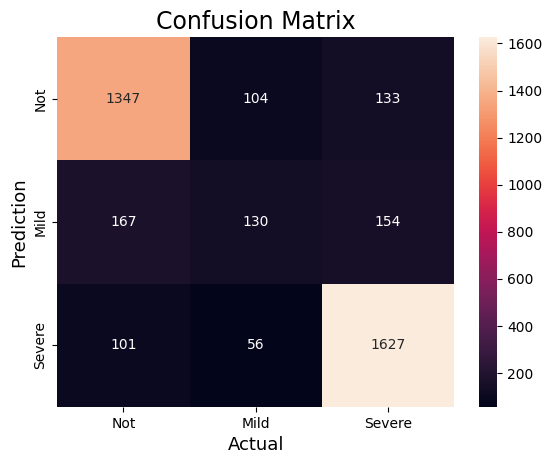

In [31]:
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Not', 'Mild', 'Severe'],
            yticklabels=['Not', 'Mild', 'Severe'])
plt.ylabel('Prediction', fontsize=13)
plt.xlabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17)
plt.show()

In [32]:
print(classification_report(true_labels, predicted_labels))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1584
           1       0.45      0.29      0.35       451
           2       0.85      0.91      0.88      1784

    accuracy                           0.81      3819
   macro avg       0.71      0.68      0.69      3819
weighted avg       0.80      0.81      0.80      3819



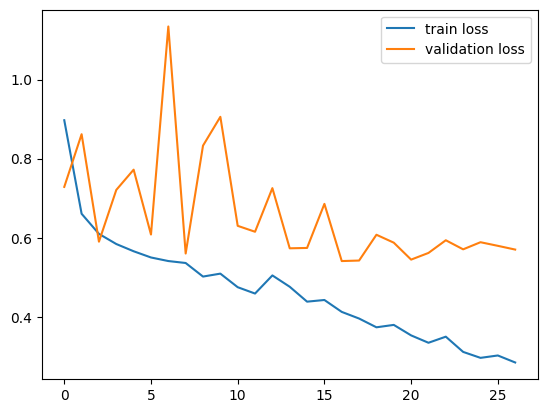

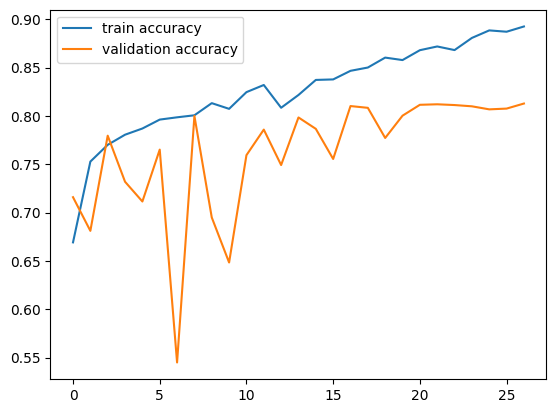

In [33]:
h = history

plt.plot(h.history['loss'], label = 'train loss')
plt.plot(h.history['val_loss'], label = 'validation loss')
plt.legend()
plt.show()

plt.plot(h.history['accuracy'], label = 'train accuracy')
plt.plot(h.history['val_accuracy'], label = 'validation accuracy')
plt.legend()
plt.show()